<img src="https://fibvisiona.com/sites/default/files/inline-images/logo-upc.png" height="50%" width="50%"/>  
  
# NASA Exoplanets
<b>Machine Learning Course Final Project </b>  
Authors: <i>Luis Alfredo León Villapún and Chidiebere Ogbuchi</i>  
Supervised by: <i>Prof. Marta Arias Vicente and Prof. Bernat Coma Puig</i>  
* * *

To develop a machine learning model that predicts whether or not an observation is a genuine candidate for an exoplanet. Exoplanets are planets that orbit stars outside of our solar system. Moreover, recent space missions have aimed to find new planets in distant stars. This has proven to be a challenging and demanding process since the methods used to validate them are sometimes indirect. For example, the quantity of light each orbit of the star is considered.  
For this work, however, we use a <a href="https://www.kaggle.com/datasets/arashnic/exoplanets?resource=download">dataset</a> gathered by the Kepler mission that includes attributes such as the planet's mass, radius, and orbital period. We may utilize the properties from this "NASA Exoplanet Dataset" observation to establish whether or not a planet is an exoplanet.

### Requirements
Please execute the cells in this section if needed.

In [1]:
!pip install opendatasets
!pip install pandas
!pip install matplotlib
!pip install ipympl
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
rcParams['figure.figsize'] = 8.19,5.789


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load Dataset

The following cell will try to download the dataset directly from kaggle. You will need a kaggle API token to be able to do so. If not, set <i>from_kaggle</i> to False when calling the function and provide a Google Drive URL from which you can download the dataset.

In [3]:
import opendatasets as od
import os
import pandas as pd
from google.colab import drive


def read_kaggle_dataset(
    kaggle_url, 
    file_name, 
    from_kaggle=True, 
    drive_url="/content/drive/My Drive/ML/sources/exoplanets.csv"):
  if from_kaggle:
    od.download(kaggle_url)
    folder_name = kaggle_url.split("/")[-1]
    df = pd.read_csv(os.path.join(folder_name, file_name))
  else:
    drive.mount('/content/drive')
    df = pd.read_csv(drive_url, header=0, sep = ",")
  return df

kaggle_url = "https://www.kaggle.com/datasets/arashnic/exoplanets"
file_name = "exoplanets.csv"
exoplanets = read_kaggle_dataset(kaggle_url, file_name)

Skipping, found downloaded files in "./exoplanets" (use force=True to force download)


### Data Exploration
Let's start first with the data exploration of the dataset. Here, we will take a first look into the dataset, the available features and classes.

In [4]:
exoplanets.head().T

,0,1,2,3,4
kepid,10797460,10797460,10811496,10848459,10854555
kepoi_name,K00752.01,K00752.02,K00753.01,K00754.01,K00755.01
kepler_name,Kepler-227 b,Kepler-227 c,NaN,NaN,Kepler-664 b
koi_disposition,CONFIRMED,CONFIRMED,CANDIDATE,FALSE POSITIVE,CONFIRMED
koi_pdisposition,CANDIDATE,CANDIDATE,CANDIDATE,FALSE POSITIVE,CANDIDATE
koi_score,1.0,0.969,0.0,0.0,1.0
koi_fpflag_nt,0,0,0,0,0
koi_fpflag_ss,0,0,0,1,0
koi_fpflag_co,0,0,0,0,0
koi_fpflag_ec,0,0,0,0,0


In [5]:
exoplanets['koi_disposition'].unique()
exoplanets['koi_pdisposition'].unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

Here, we can see different attributes that we can classify in different categories.  
<b>Identifiers</b>  
First we have identifiers such as  kepid, kepoi_name, kepler_name.  
<b>Target Classes</b>  
This would be koi_disposition and koi_pdisposition. Since the objective of our project is to better determine which planets are candidates, we can use the <i>koi_pdisposition</i> feature as our target class. This makes this problem a binary classification problem.  
<b>Features</b>  
The rest of the columns are clearly features that constitute the dimensions of our problem. Here we can also make some distinctions.
- Flags: The flags are often used to "mark" some rows as false positives. Since we want to avoid bias with our analysis we will discard this columns.
- Errors: These columns contain error values from other columns.

In [6]:
exoplanets.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
kepid,9564.0,NaN,NaN,NaN,7690628.327373,2653459.080974,757450.0,5556034.25,7906892.0,9873066.5,12935144.0
kepoi_name,9564,9564,K00752.01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kepler_name,2359,2359,Kepler-227 b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_disposition,9564,3,FALSE POSITIVE,4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_pdisposition,9564,2,FALSE POSITIVE,4847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_score,8054.0,NaN,NaN,NaN,0.480829,0.476928,0.0,0.0,0.334,0.998,1.0
koi_fpflag_nt,9564.0,NaN,NaN,NaN,0.208595,4.76729,0.0,0.0,0.0,0.0,465.0
koi_fpflag_ss,9564.0,NaN,NaN,NaN,0.232748,0.422605,0.0,0.0,0.0,0.0,1.0
koi_fpflag_co,9564.0,NaN,NaN,NaN,0.197512,0.398142,0.0,0.0,0.0,0.0,1.0
koi_fpflag_ec,9564.0,NaN,NaN,NaN,0.120033,0.325018,0.0,0.0,0.0,0.0,1.0


In [7]:
exoplanets.shape

(9564, 49)

We can observe that we are mainly dealing with numerical data. The only categorical columns are <b>kepoi_name</b>, <b>kepler_name</b>, <b>koi_disposition</b>, and <b>koi_pdisposition</b>. Apparently the <b>koi_pdisposition</b> column can be used as our target variable in the models we create, since it indicates if, given certain characteristics, a planet can be considered or not as a candidate exoplanet.  
It is also to note that the dataset has almost 10k lines, a small dataset, against 49 columns. Depending on the models we decide to try, it might be useful to perform dimensionality reduction on it. Also, since we don't have a lot of rows, we could easily take advantage of compute heavy approaches like SVM and also try cross validation to better approach our error estimation.

#### Finding out missing values

<Axes: xlabel='missing', ylabel='col'>

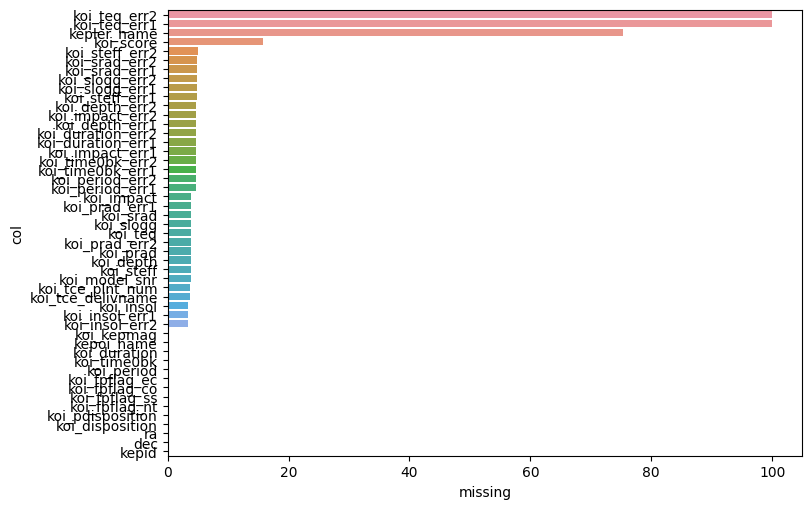

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

missing = []
for col in exoplanets.columns:
    missing.append((col, (exoplanets[col].isna().sum() / exoplanets.shape[0]) * 100))
missing = pd.DataFrame(missing).sort_values(by=[1], ascending=False)
missing.rename(columns={0: 'col', 1: 'missing'}, inplace=True)
sns.barplot(data=missing, x='missing', y='col', orient="h")

We can see that some of the error values are almost fully NaNs. However, since they are error values, this is acceptable. For the variable <b>kebler_name</b>, we have that this represents if the candidate planet has received a name or not. The ones without a name can be given a random id as temporary name. <b>koi_score</b> means the confidence level between 0 and 1, that the candidate is a exoplanet or not. It's a little worrysome that the empty data is a little less than 20%.

#### Distribution of the variables

We are now to perform a quick evaluation on the distribution of the variables. We are discarding the variables that are identifiers and the class variable. Also we are discarding the error and flag features.

In [9]:
features = [
    col for col in exoplanets.columns if col not in [
    "kepid", "kepoi_name", "kepler_name", "koi_disposition", "koi_pdisposition"] 
    and "err" not in col and "flag" not in col] 
sample = exoplanets.sample(frac=0.05)
len(features)

18

<Axes: xlabel='koi_score', ylabel='Count'>

Text(0.5, 1.0, 'koi_score')

<Axes: xlabel='koi_period', ylabel='Count'>

Text(0.5, 1.0, 'koi_period')

<Axes: xlabel='koi_time0bk', ylabel='Count'>

Text(0.5, 1.0, 'koi_time0bk')

<Axes: xlabel='koi_impact', ylabel='Count'>

Text(0.5, 1.0, 'koi_impact')

<Axes: xlabel='koi_duration', ylabel='Count'>

Text(0.5, 1.0, 'koi_duration')

<Axes: xlabel='koi_depth', ylabel='Count'>

Text(0.5, 1.0, 'koi_depth')

<Axes: xlabel='koi_prad', ylabel='Count'>

Text(0.5, 1.0, 'koi_prad')

<Axes: xlabel='koi_teq', ylabel='Count'>

Text(0.5, 1.0, 'koi_teq')

<Axes: xlabel='koi_insol', ylabel='Count'>

Text(0.5, 1.0, 'koi_insol')

<Axes: xlabel='koi_model_snr', ylabel='Count'>

Text(0.5, 1.0, 'koi_model_snr')

<Axes: xlabel='koi_tce_plnt_num', ylabel='Count'>

Text(0.5, 1.0, 'koi_tce_plnt_num')

<Axes: xlabel='koi_tce_delivname', ylabel='Count'>

Text(0.5, 1.0, 'koi_tce_delivname')

<Axes: xlabel='koi_steff', ylabel='Count'>

Text(0.5, 1.0, 'koi_steff')

<Axes: xlabel='koi_slogg', ylabel='Count'>

Text(0.5, 1.0, 'koi_slogg')

<Axes: xlabel='koi_srad', ylabel='Count'>

Text(0.5, 1.0, 'koi_srad')

<Axes: xlabel='ra', ylabel='Count'>

Text(0.5, 1.0, 'ra')

<Axes: xlabel='dec', ylabel='Count'>

Text(0.5, 1.0, 'dec')

<Axes: xlabel='koi_kepmag', ylabel='Count'>

Text(0.5, 1.0, 'koi_kepmag')

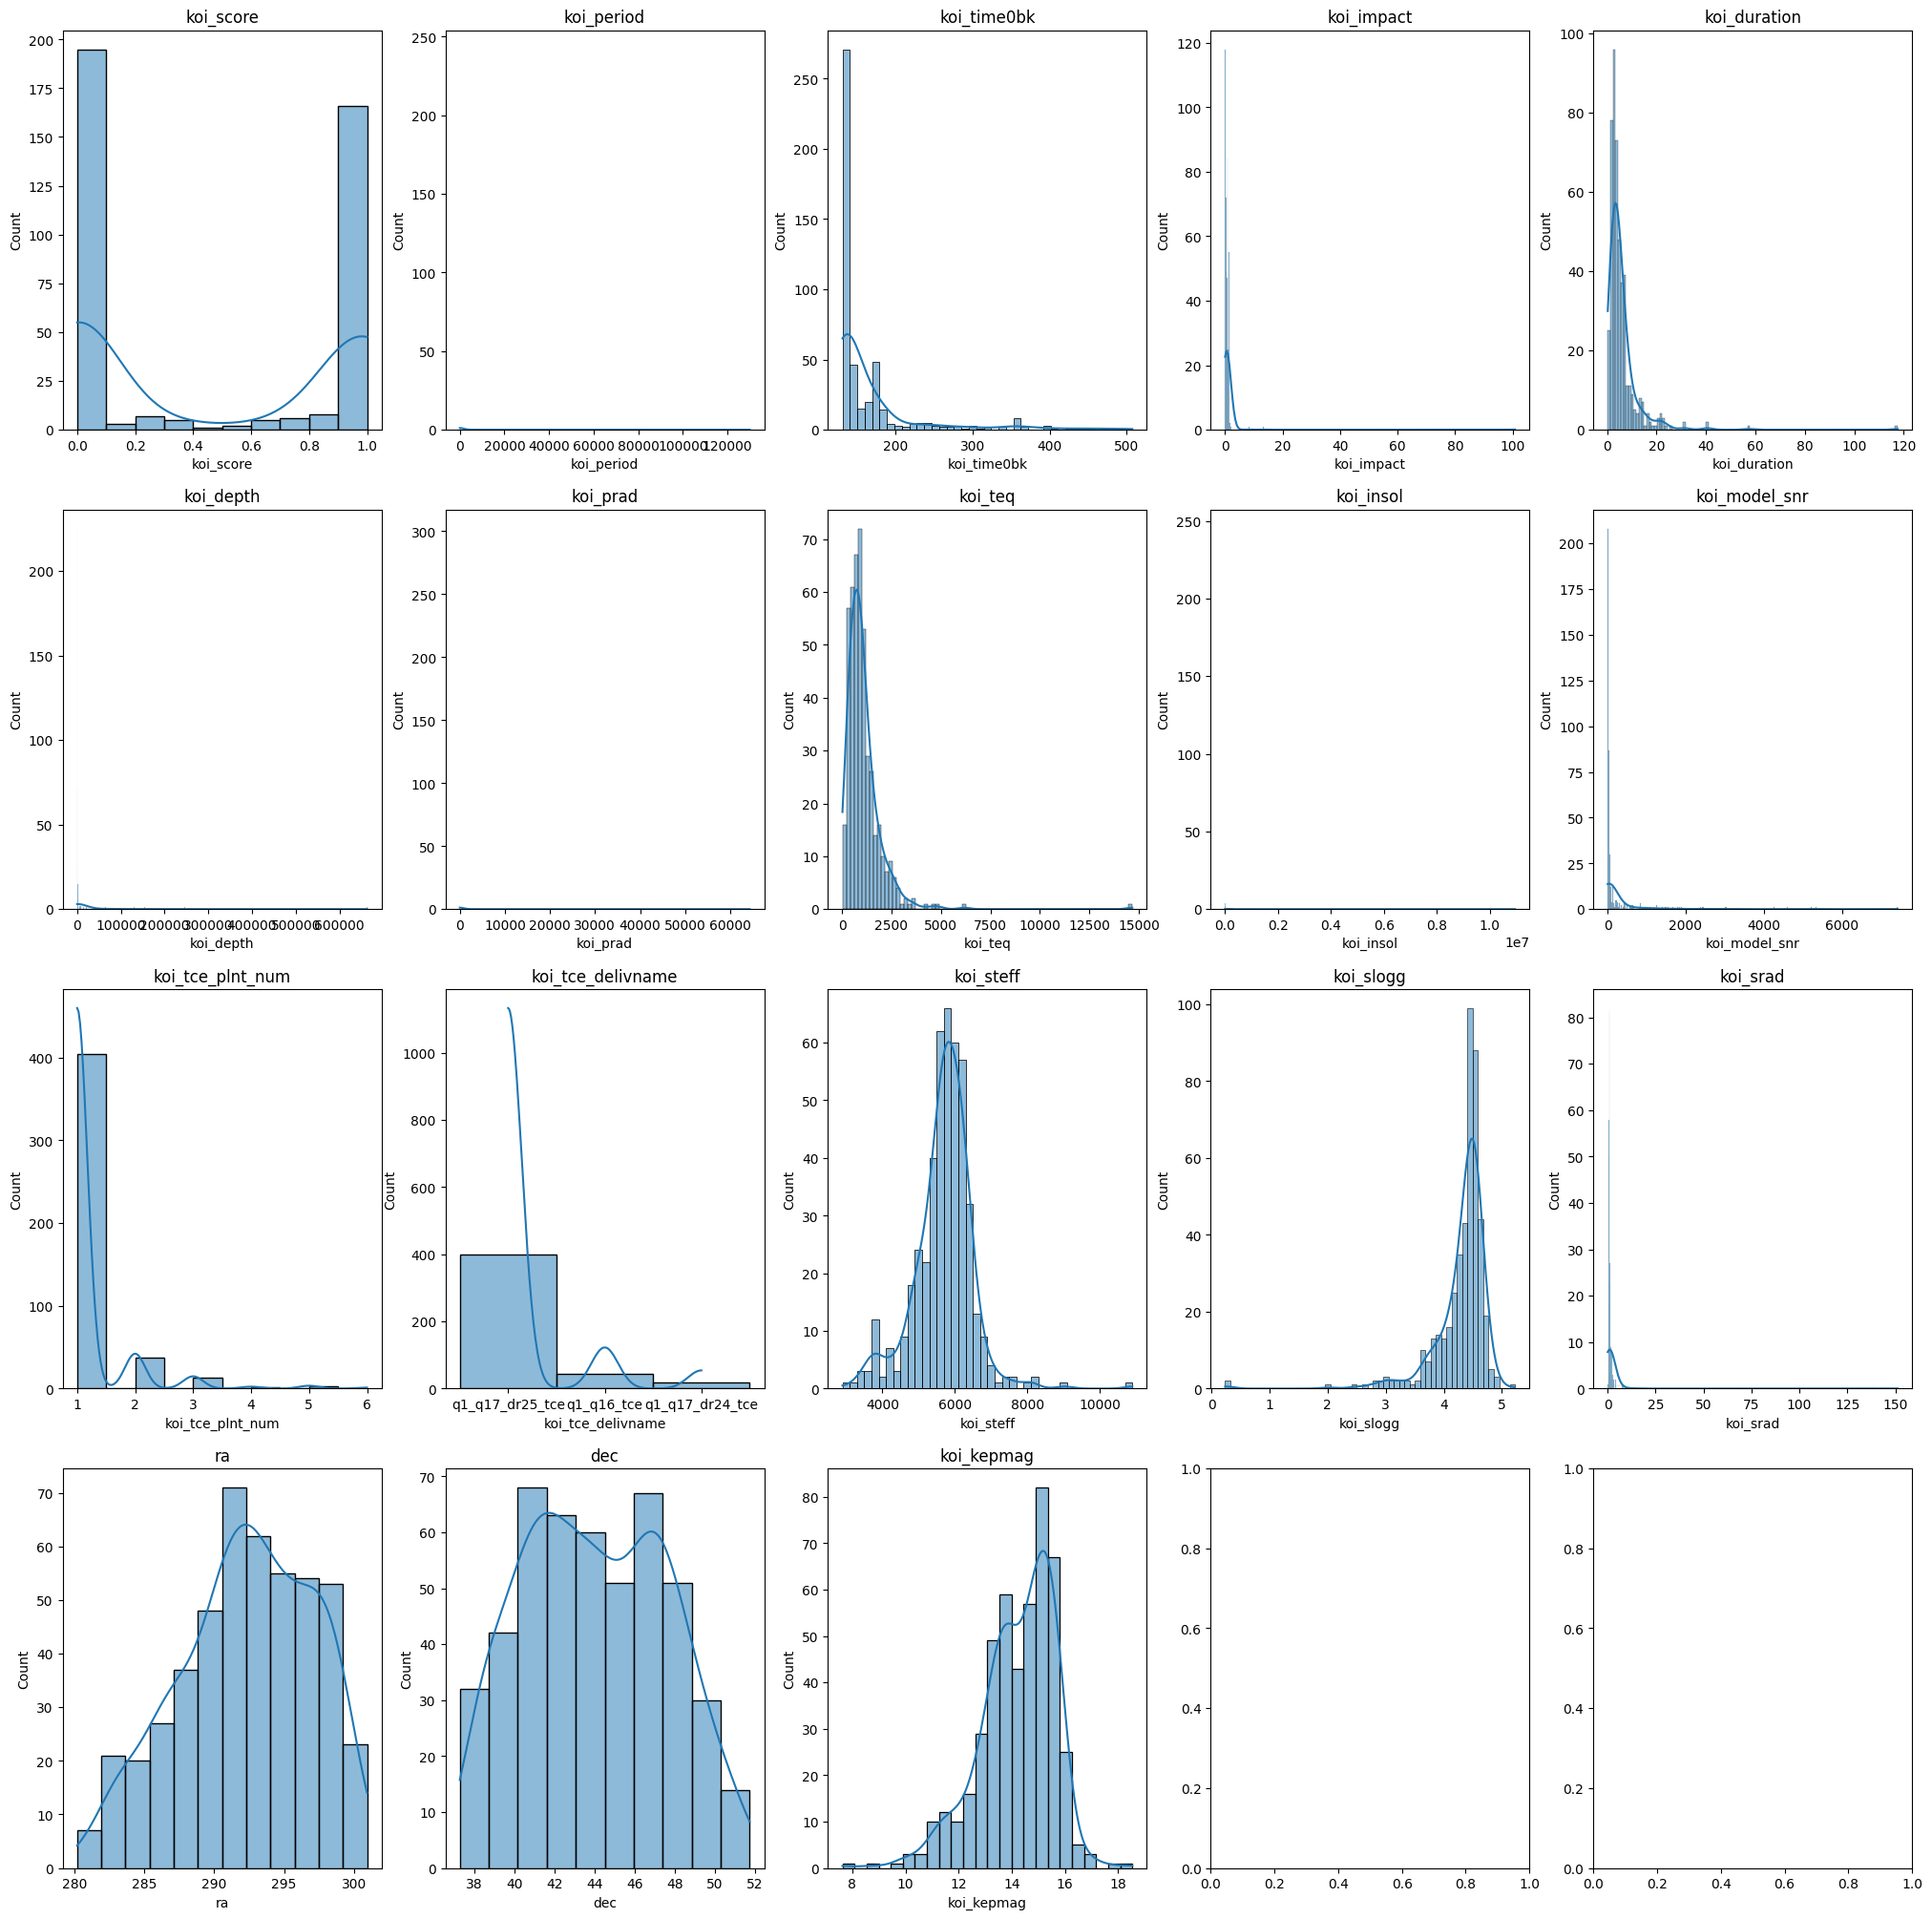

In [10]:
fig, axes = plt.subplots(nrows = 4, ncols = 5)
axes = axes.flatten()
fig.set_size_inches(25,25)

for ax, col in zip(axes, features):
    sns.histplot(sample[col], ax = ax, kde=True)
    ax.set_title(col)

<Axes: xlabel='koi_score', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_score'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_score')

<Axes: xlabel='koi_period', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_period'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_period')

<Axes: xlabel='koi_time0bk', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_time0bk'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_time0bk')

<Axes: xlabel='koi_impact', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_impact'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_impact')

<Axes: xlabel='koi_duration', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_duration'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_duration')

<Axes: xlabel='koi_depth', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_depth'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_depth')

<Axes: xlabel='koi_prad', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_prad'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_prad')

<Axes: xlabel='koi_teq', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_teq'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_teq')

<Axes: xlabel='koi_insol', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_insol'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_insol')

<Axes: xlabel='koi_model_snr', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_model_snr'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_model_snr')

<Axes: xlabel='koi_tce_plnt_num', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_tce_plnt_num'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_tce_plnt_num')

<Axes: xlabel='koi_steff', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_steff'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_steff')

<Axes: xlabel='koi_slogg', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_slogg'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_slogg')

<Axes: xlabel='koi_srad', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_srad'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_srad')

<Axes: xlabel='ra', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: ra'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'ra')

<Axes: xlabel='dec', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: dec'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'dec')

<Axes: xlabel='koi_kepmag', ylabel='Density'>

[Text(0.5, 1.0, 'Distribution of Column: koi_kepmag'), Text(0.5, 0, '')]

Text(0.5, 1.0, 'koi_kepmag')

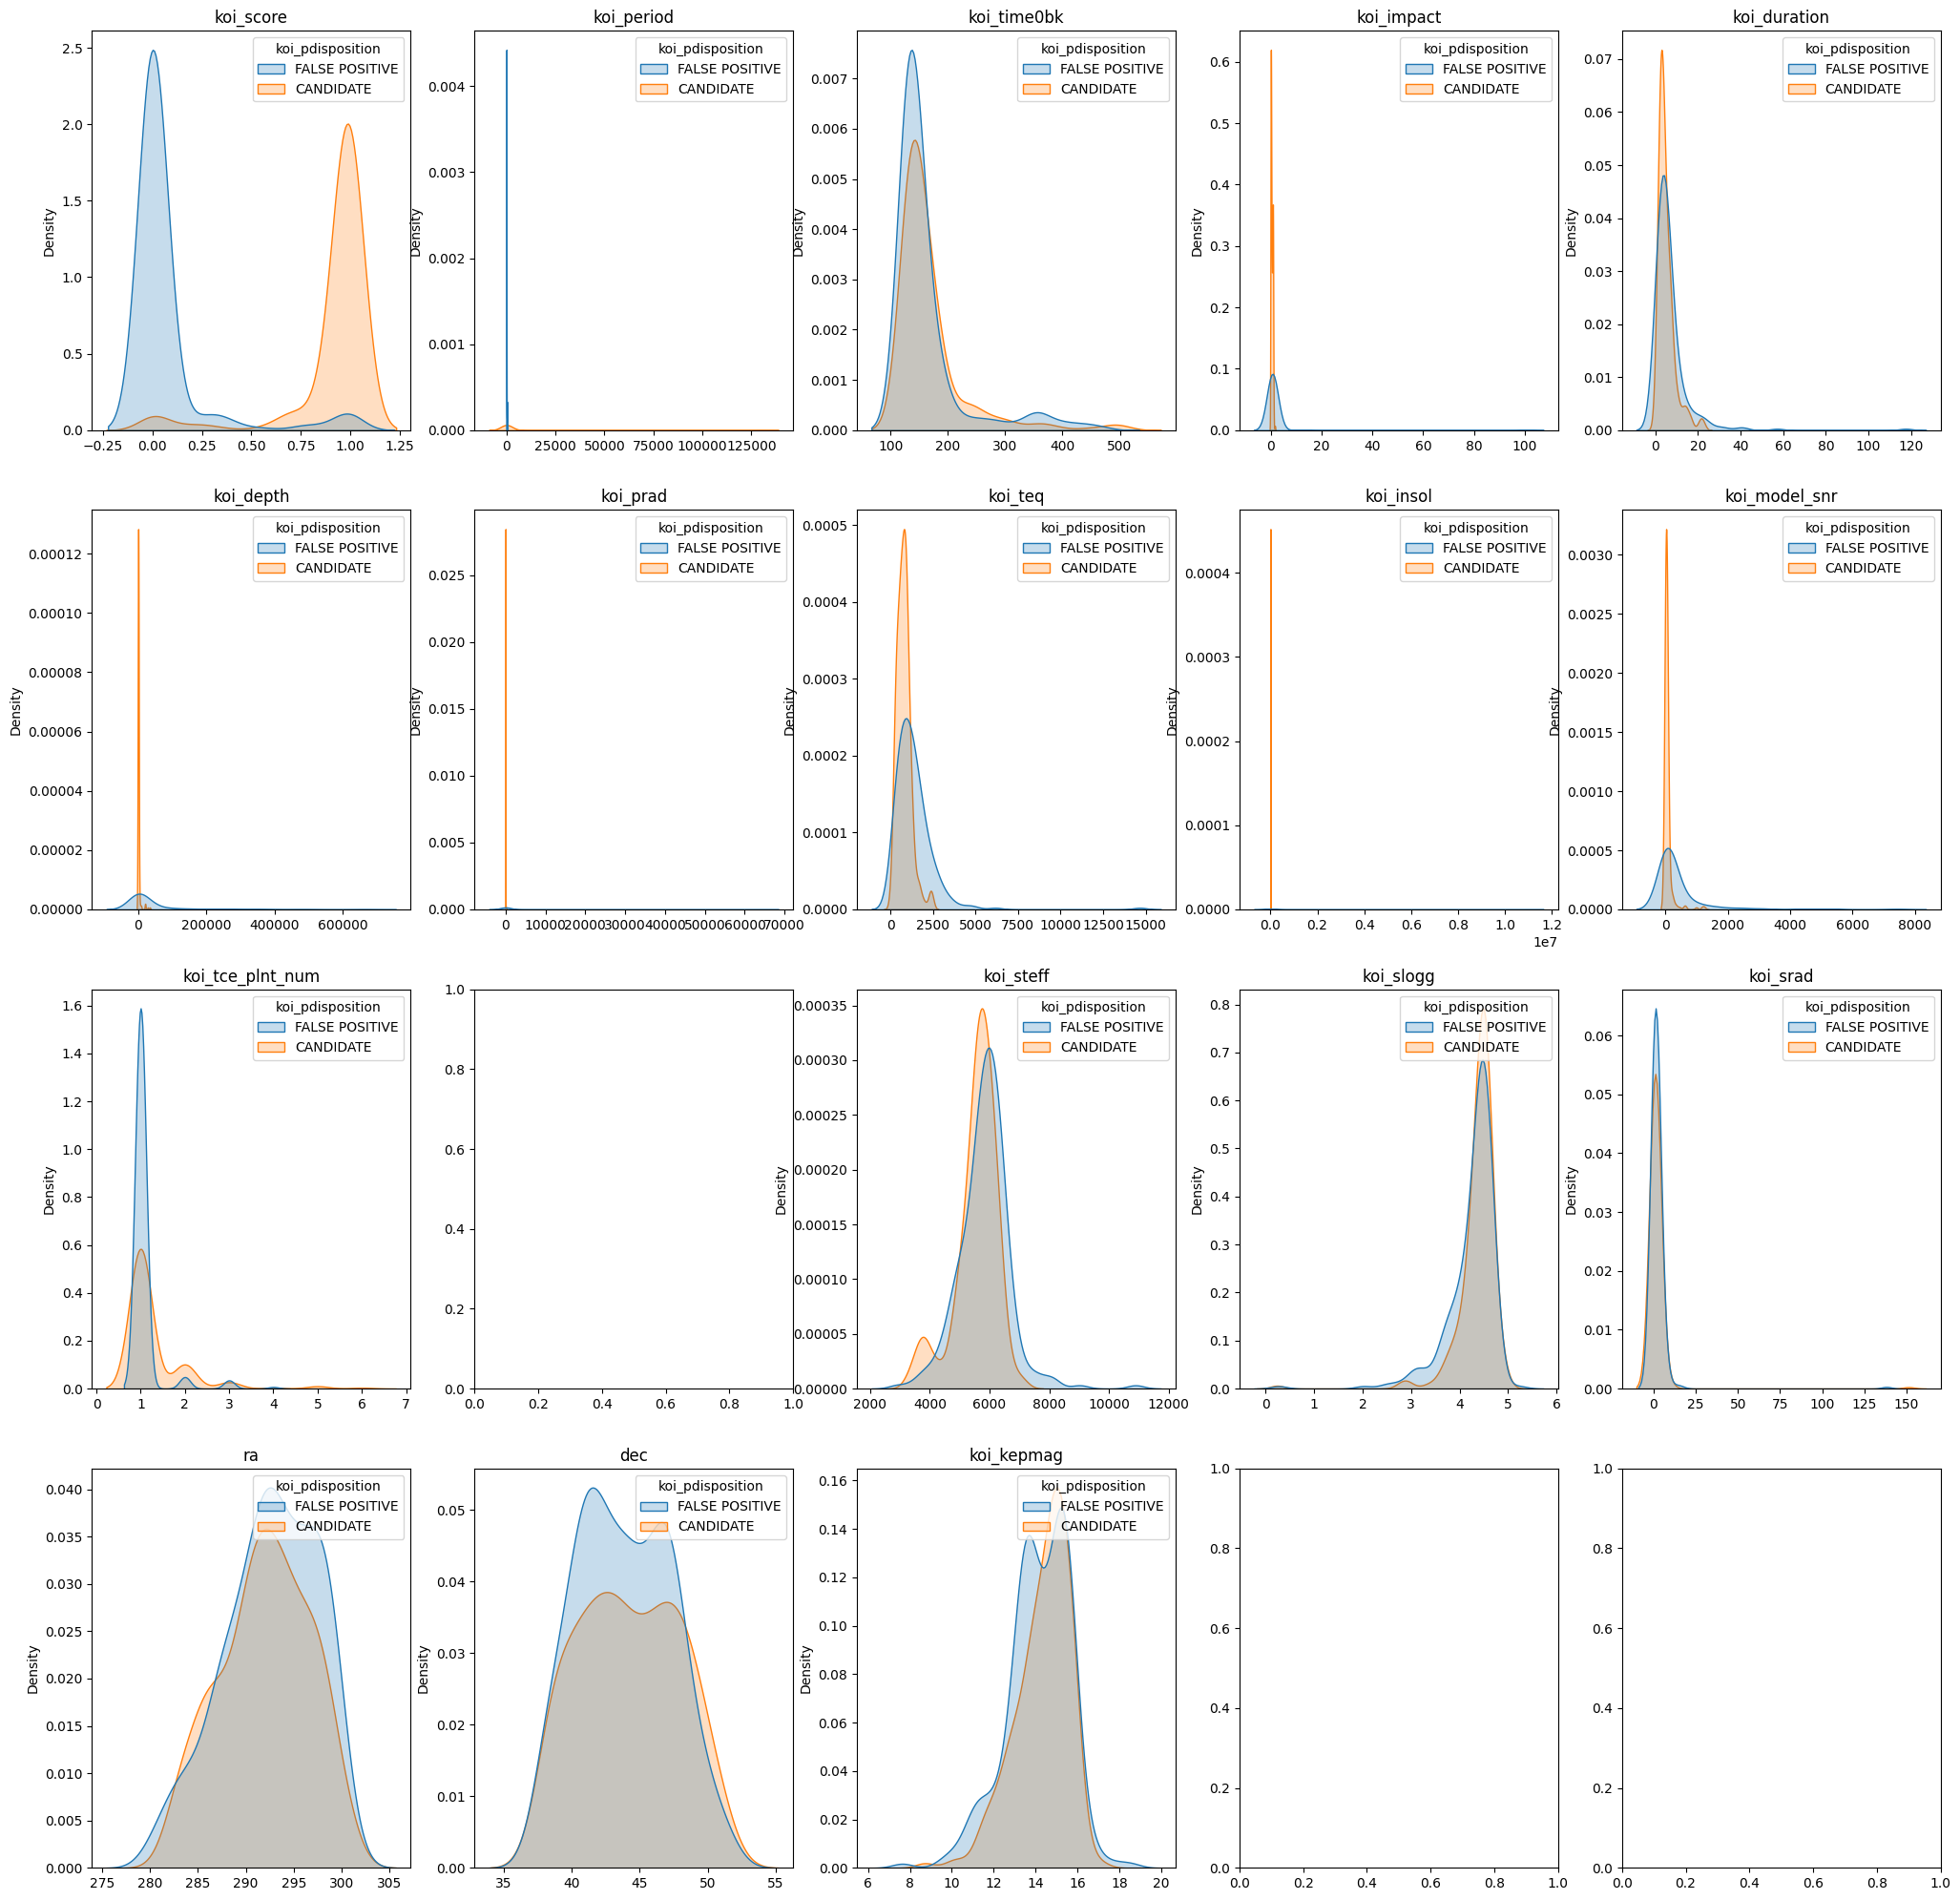

In [11]:
fig, axes = plt.subplots(nrows = 4, ncols = 5)
axes = axes.flatten()
fig.set_size_inches(25,25)
cnt = 0
for ax, col in zip(axes, features):
    try:
        data = sample[[col, 'koi_pdisposition']]  # select the data
        sns.kdeplot(data=data, x=col, hue='koi_pdisposition', fill=True, ax=ax, warn_singular=False)
        ax.set(title=f'Distribution of Column: {col}', xlabel=None)
        ax.set_title(col)
        cnt += 1
    except TypeError as e:
        continue
plt.show()

It seems that <b>koi_score</b> is a measure that already indicates whether a row can be labeled as CANDIDATE or FALSE POSITIVE. This can aslso introduce bias to our models so we will also discard this column.

#### Reducing rows and columns

We have seen that not all features in the dataset are actually useful or can introduce bias. Let's try to reduce them.

In [12]:
features = [feat for feat in features if 'fpflag' not in feat and 'name' not in feat and feat != 'koi_score'] # Removing the fpflags since these are only indicative.

exoplanets[features].head()
exoplanets[features].isnull().sum()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,9.488036,170.538750,0.146,2.95750,616.0,2.26,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,54.418383,162.513840,0.586,4.50700,875.0,2.83,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,19.899140,175.850252,0.969,1.78220,10800.0,14.60,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,1.736952,170.307565,1.276,2.40641,8080.0,33.46,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,2.525592,171.595550,0.701,1.65450,603.0,2.75,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


koi_period            0
koi_time0bk           0
koi_impact          363
koi_duration          0
koi_depth           363
koi_prad            363
koi_teq             363
koi_insol           321
koi_model_snr       363
koi_tce_plnt_num    346
koi_steff           363
koi_slogg           363
koi_srad            363
ra                    0
dec                   0
koi_kepmag            1
dtype: int64

In [13]:
index_no_null = exoplanets[features].dropna().index
exoplanets.iloc[index_no_null]

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


#### Model Selection

We can now play with different models and evaluate which one fits our data in the better way. Since the objective of this project is to create a model that filters out observations that cannot be exoplanets, this means that we have to find a nice balance between being too selective (because then we could miss potential candidates) or being too broad (basically this would make the model useless). Let's first play with an SVM and see what we get.

In [14]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
def split_dataset(exoplanets):
    X = exoplanets.iloc[index_no_null][features]
    y = exoplanets.iloc[index_no_null]['koi_pdisposition']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # Using default 0.75 for train 0.25 for test.
    print(y_train.unique(), y_test.unique())
    return X_train, X_test, y_train, y_test

We can try using PCA to find relevant features upon the remaining ones. Let's compare results from using PCA and not using it on our first model.

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

def scale_dataset(X_train, X_test, scaler_class):
    scaler = scaler_class()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def fit_PCA(X_train, X_test, n_components='mle'):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca, sum(pca.explained_variance_ratio_*100)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def svm(X_train, X_test, y_train, y_test):
    svc = SVC(kernel='poly', random_state=42)
    svc.fit(X_train, y_train)
    y_pred_svc = svc.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_svc)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
    disp.plot(cmap=plt.cm.Blues)
    accuracy = accuracy_score(y_test, y_pred_svc)
    recall = recall_score(y_test, y_pred_svc, pos_label="CANDIDATE", average=None)
    precision = precision_score(y_test, y_pred_svc, pos_label="CANDIDATE", average=None)
    print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}")
    plt.show()

In [17]:
# First we split our dataset
X_train, X_test, y_train, y_test = split_dataset(exoplanets=exoplanets)

['CANDIDATE' 'FALSE POSITIVE'] ['CANDIDATE' 'FALSE POSITIVE']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.7983907018328118, Recall: [0.87425658 0.71415094], Precision: [0.77252252 0.83646409]


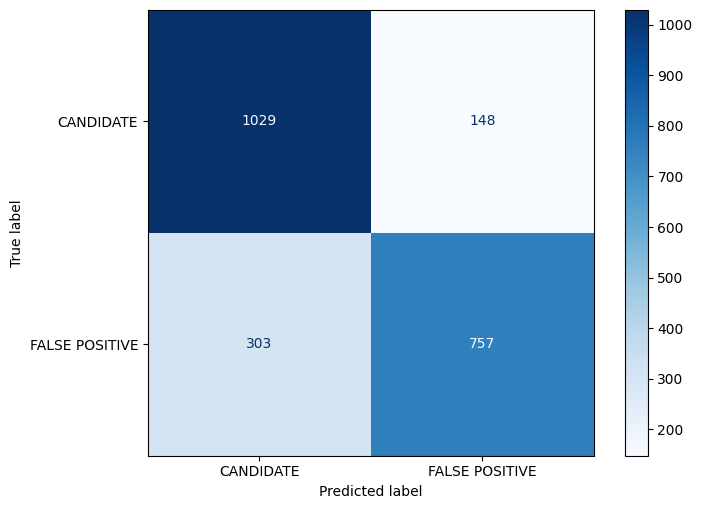

In [18]:
# Simple SVM with scaled values
X_train_scaled, X_test_scaled = scale_dataset(X_train, X_test, MinMaxScaler)
svm(X_train_scaled, X_test_scaled, y_train, y_test)

Here, we are using a MinMaxScaler to standardize the values of the features. This scaler is better for our use case as we can see (review above graphs) that not all of our features are following a gaussian distribution, and this scaler has the plus that it is not as sensible to outliers. 

#### PCA
So far, our first model used all of the 16 remaining features to create our predictions. Let's see if using PCA we can come up with components that are more representative on the data.


<Axes: >

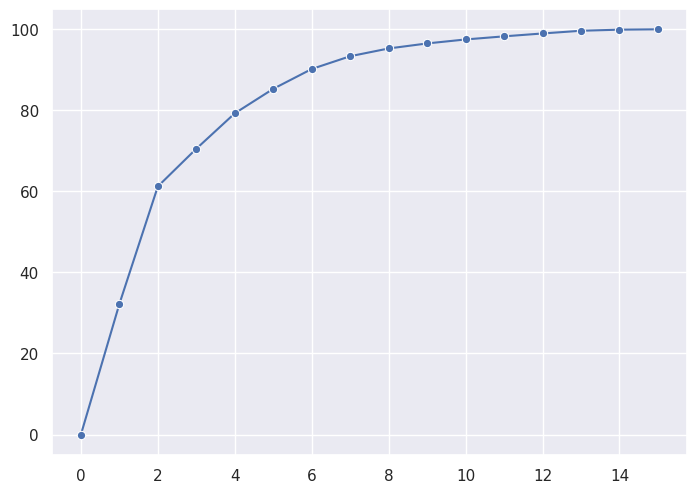

In [19]:
X_train_scaled, X_test_scaled = scale_dataset(X_train, X_test, MinMaxScaler)
variance_explained = []
for i in range(len(features)):
  X_train_scaled_pca, X_test_scaled_pca, variance_exp = fit_PCA(X_train_scaled, X_test_scaled, 
                                                  n_components=i)
  variance_explained.append(variance_exp)

sns.set()
sns.lineplot(x=[i for i in range(len(features))], y=variance_explained, marker="o")

Here, we can see how using 10 principal components will preserve most of the variance on the dataset (97%). For the rest of the analysis, we will use this components to feed our models.

Even though we are going to use 10 components, I'm curious about visualizing on 3 dimensions how this data looks like.

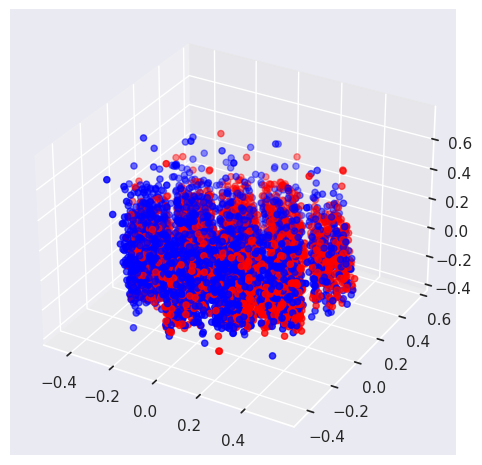

In [20]:

import numpy as np
X_train_scaled_pca_3dim, X_test_scaled_pca_3dim, variance_exp = fit_PCA(X_train_scaled, X_test_scaled, 
                                                  n_components=3)
#X_train_scaled_pca_3dim[:, 0]
ax = plt.axes(projection='3d')
colors = y_train.map({'CANDIDATE': 'red', 'FALSE POSITIVE': 'blue'})
ax.scatter3D(X_train_scaled_pca_3dim[:,0], X_train_scaled_pca_3dim[:,1], X_train_scaled_pca_3dim[:, 2], c=colors)
plt.show()

With 3 components we preserve around 70% of the variance, and we can clearly see regions were data points could be clustered as CANDIDATE and regions were data points could be clustered as FALSE POSITIVE. The objective now is that raising this number to 10 components, these regions will become more clear for classification purposes, even though we cannot graph it of course.

#### Ridge Classifier
Let's see what happens when we use a Ridge Classifier with cross validation so that we can better estimate the value of the alpha.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.7827447474295932, Recall: [0.86236194 0.69433962], Precision: [0.75802838 0.81959911]


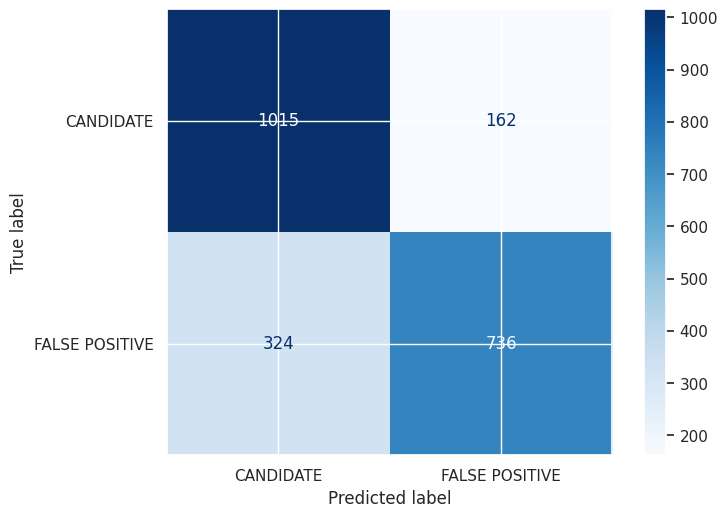

In [21]:
from sklearn.linear_model import RidgeClassifierCV

def ridge(X_train, y_train, X_test, y_test, alphas=[0.1, 0.01, 0.001]):
  rg = RidgeClassifierCV(alphas=alphas, cv=10)
  rg.fit(X_train, y_train)
  y_pred = rg.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rg.classes_)
  disp.plot(cmap=plt.cm.Blues)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
  precision = precision_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
  print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}")
  plt.show()

ridge(X_train_scaled_pca, y_train, X_test_scaled_pca, y_test)

#### Stochastic Gradient Descent Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.7684398748323648, Recall: [0.91758709 0.60283019], Precision: [0.71952032 0.86820652]


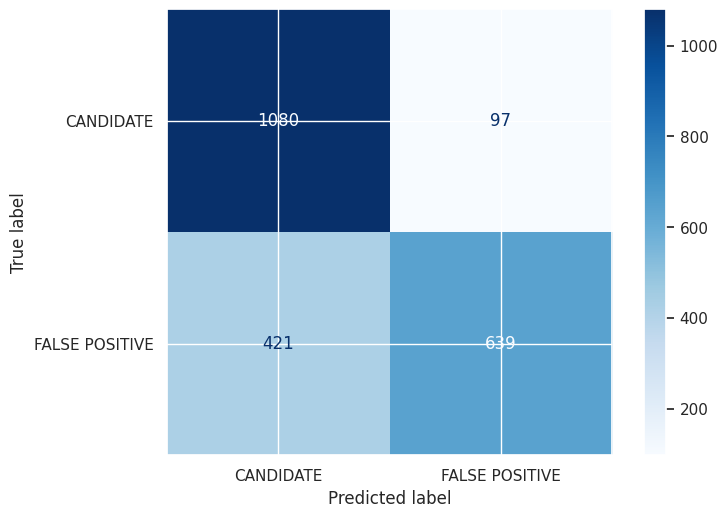

In [22]:
from sklearn.linear_model import SGDClassifier

def sgdc(X_train, y_train, X_test, y_test):
  sgdc = SGDClassifier(max_iter=1000, tol=1e-3)
  sgdc.fit(X_train, y_train)
  y_pred = sgdc.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgdc.classes_)
  disp.plot(cmap=plt.cm.Blues)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
  precision = precision_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
  print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}")
  plt.show()

sgdc(X_train_scaled_pca, y_train, X_test_scaled_pca, y_test)

#### Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.8019669199821189, Recall: [0.82837723 0.77264151], Precision: [0.80180921 0.80215475]


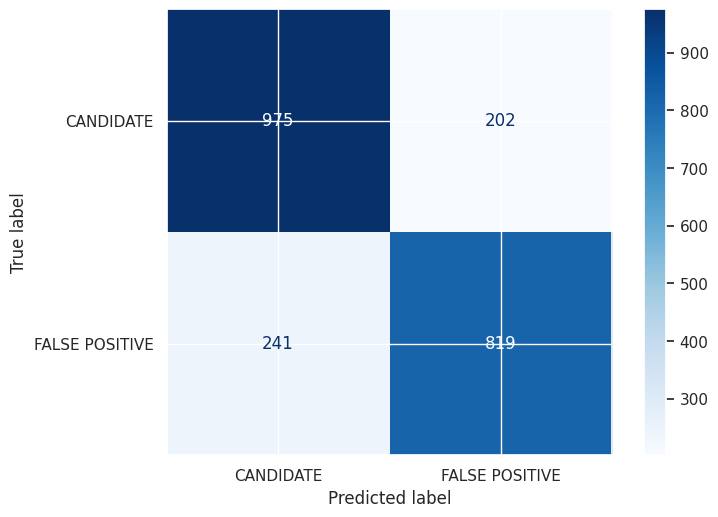

In [23]:
from sklearn.ensemble import RandomForestClassifier

def random_forest(X_train, y_train, X_test, y_test, n_estimators=100, criterion='log_loss', max_depth=10):
  rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, criterion=criterion, max_depth=max_depth)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
  disp.plot(cmap=plt.cm.Blues)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
  precision = precision_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
  print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}")
  plt.show()

random_forest(X_train_scaled_pca, y_train, X_test_scaled_pca, y_test, max_depth=20)

#### Multi Layer Perceptron Classifier

In [24]:
X_train_scaled_pca.shape

(6708, 15)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.8265534197586053, Recall: [0.82497876 0.82830189], Precision: [0.84215091 0.8099631 ]


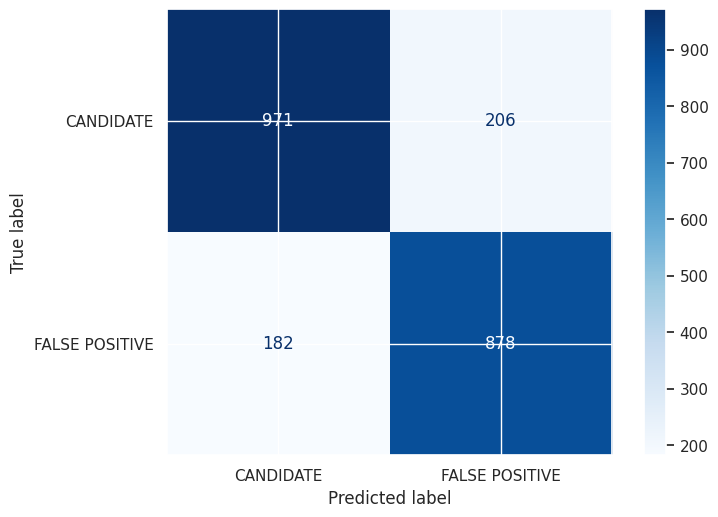

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.8198480107286544, Recall: [0.82752761 0.81132075], Precision: [0.82964225 0.80903104]


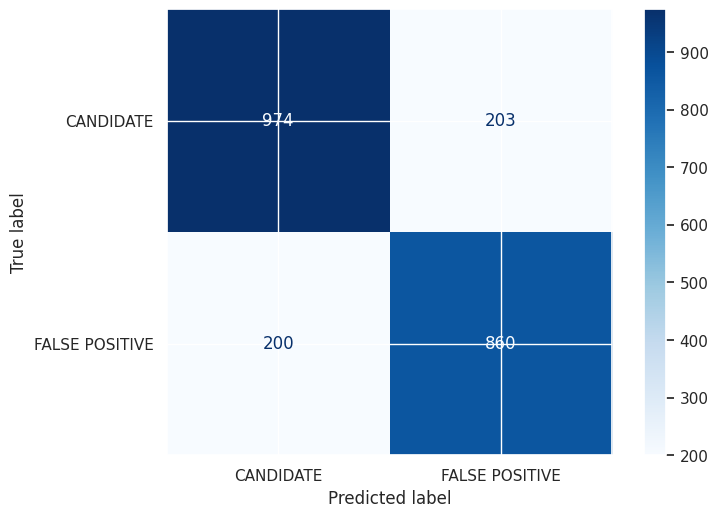

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.8202950379973178, Recall: [0.86830926 0.76698113], Precision: [0.80535855 0.83987603]


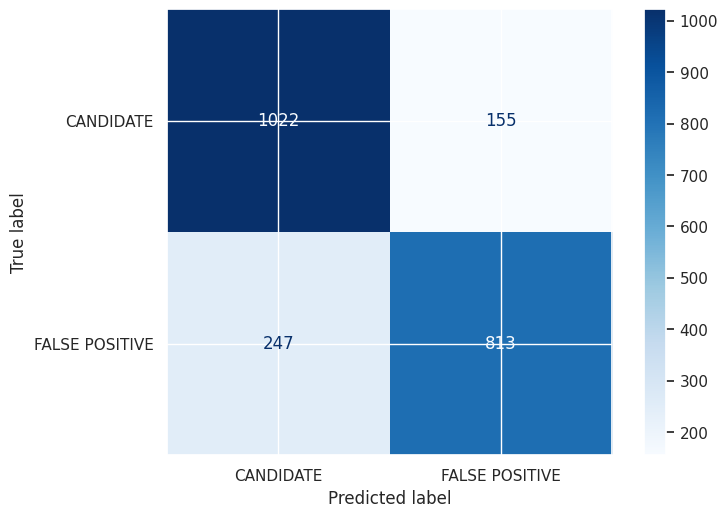

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'CANDIDATE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.8319177469825659, Recall: [0.83602379 0.82735849], Precision: [0.84318766 0.81962617]


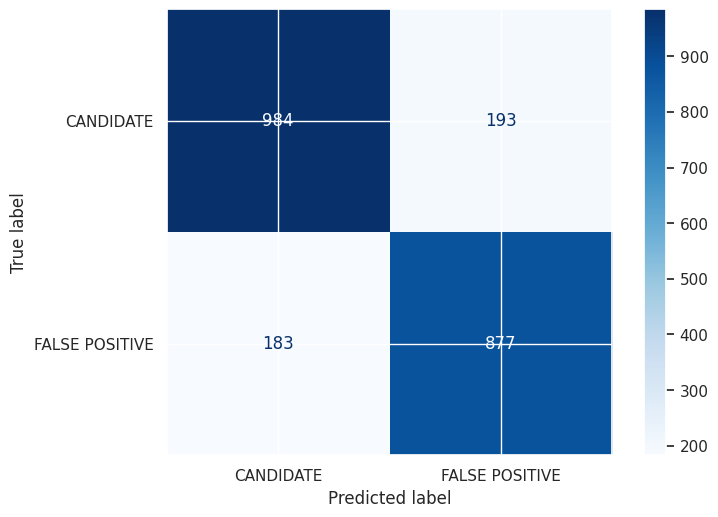

In [25]:
from sklearn.neural_network import MLPClassifier

def mlpc(X_train, y_train, X_test, y_test, hls=(500, 50, 5)):
  mlpc = MLPClassifier(hidden_layer_sizes=hls, random_state=42, activation='tanh')
  mlpc.fit(X_train, y_train)
  y_pred = mlpc.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlpc.classes_)
  disp.plot(cmap=plt.cm.Blues)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
  precision = precision_score(y_test, y_pred, pos_label="CANDIDATE", average=None)
  print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}")
  plt.show()


for hls in [(500, 50, 5), (100, 25, 5), (100, 10), (625, 25, 5)]:
  mlpc(X_train_scaled_pca, y_train, X_test_scaled_pca, y_test, hls=hls)